In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
/kaggle/input/kmeans/kmeans.py


In [139]:
file = open(r'/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df = pd.read_csv(file)
file.close()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [140]:
import sys
sys.path.append(r'/kaggle/input/kmeans/')
from kmeans import run_kmeans

In [141]:
def plot_clusters(X, mu, c):
    #2 features only (so that it can be plotted on xy plane)
    colors = ['b','g','r','c','m','y',
              'tab:brown','tab:pink','tab:purple','tab:olive']
    k=len(mu)
    for j in range(k):
        cluster_j = X[c==j]
        plt.scatter(cluster_j[:,0],cluster_j[:,1],color = colors[j])
    plt.scatter(mu[:,0],mu[:,1],color = 'k',marker='x')
    plt.show()
    
def elbow(X, k_max=10, num_init=10, num_iters=10):
    #k_max <= 10 coz 10 colors
    J,mu,c = [],[],[]
    for k in range(2, k_max+1):
        J_k, mu_k, c_k = run_kmeans(X, k, num_init, num_iters)
        J.append(J_k);mu.append(mu_k);c.append(c_k)
    plt.plot(np.arange(2, k_max+1), J)
    plt.show()
    return J,mu,c

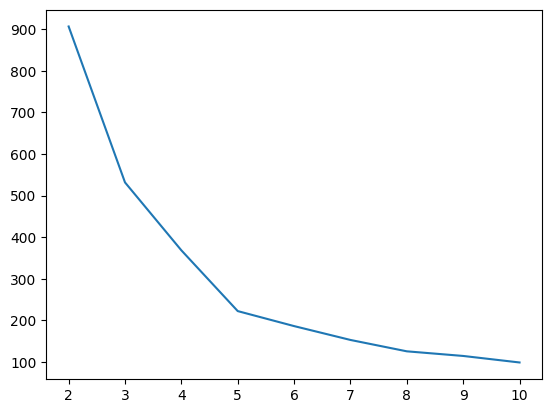

In [142]:
X_train = df[['Annual Income (k$)','Spending Score (1-100)']].to_numpy()
J,mu,c=elbow(X_train)

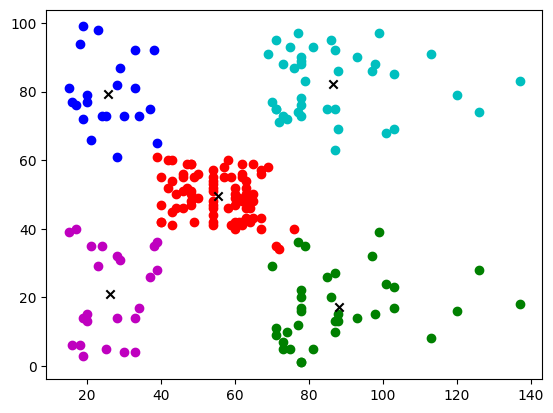

In [143]:
plot_clusters(X_train,mu[5-2],c[5-2])#'elbow' at k=5

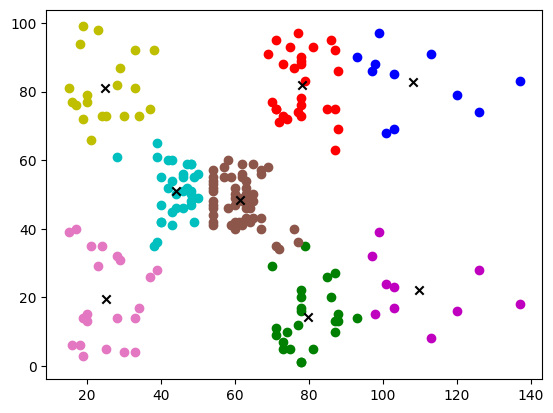

In [144]:
plot_clusters(X_train,mu[8-2],c[8-2])

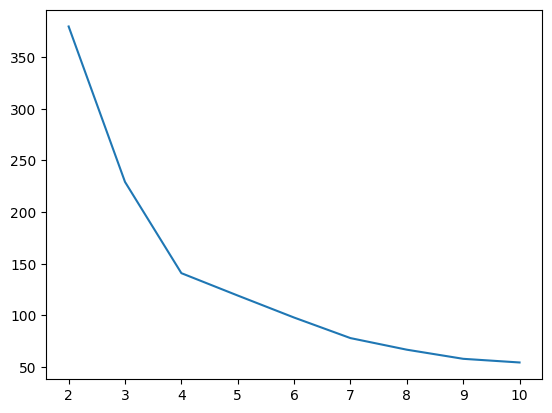

In [145]:
X_train = df[['Age','Spending Score (1-100)']].to_numpy()
J,mu,c = elbow(X_train)

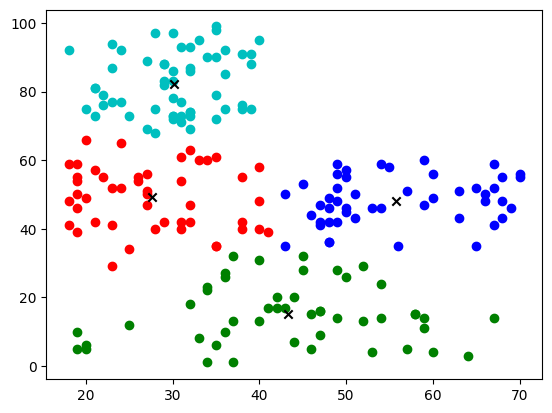

In [146]:
plot(X, mu[4-2], c[4-2])#'elbow' at k=4

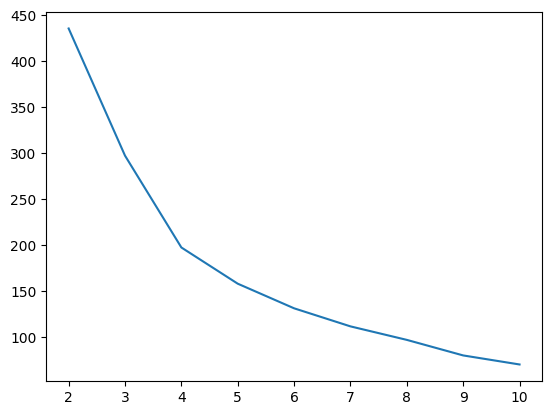

In [147]:
X_train = df[['Age','Annual Income (k$)']].to_numpy()
J,mu,c = elbow(X_train)

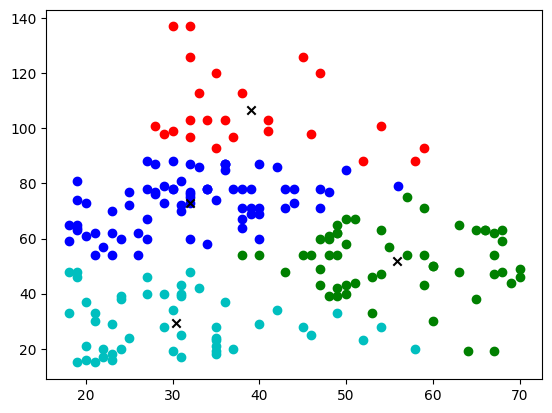

In [148]:
plot(X_train,mu[4-2],c[4-2])